In [1140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model, datasets
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, CategoricalNB
warnings.filterwarnings('ignore')

In [1141]:
#Load dataset
Grid_QOL = pd.read_csv(r'C:\Users\Aaron\Downloads\QOLdataCombined.csv')

In [1142]:
#Display beginning data points
Grid_QOL.head()

,Unnamed: 0,Age_of_Residents_2019,White_Population_2020,Black_Population_2020,Asian_Population_2020,All_Other_Races_2020,Hispanic_Latino_2020,High_School_Diploma_2019,Student Absenteeism 2019,Grocery_Proximity_2019,Home_Ownership_2019,Violent_Crime_Rate_2018,Property_Crime_Rate_2018,Voter_Participation_2020,Quality of Life Metric
0,2,30,59.78,20.91,1.73,7.00,10.59,88,0.19,27.95,35,6.7,44.1,71,0.645258
1,3,34,79.00,6.67,4.54,4.45,5.35,97,0.04,35.83,46,3.9,69.5,75,0.763501
2,4,50,88.44,1.63,4.28,2.74,2.91,100,0.06,18.29,96,0.0,12.5,87,0.818602
3,5,36,10.75,71.24,1.17,4.53,12.31,82,0.25,22.03,19,11.7,45.3,47,0.593606
4,6,35,14.64,70.90,0.50,3.84,10.13,68,0.23,66.67,37,27.7,102.2,53,0.689710


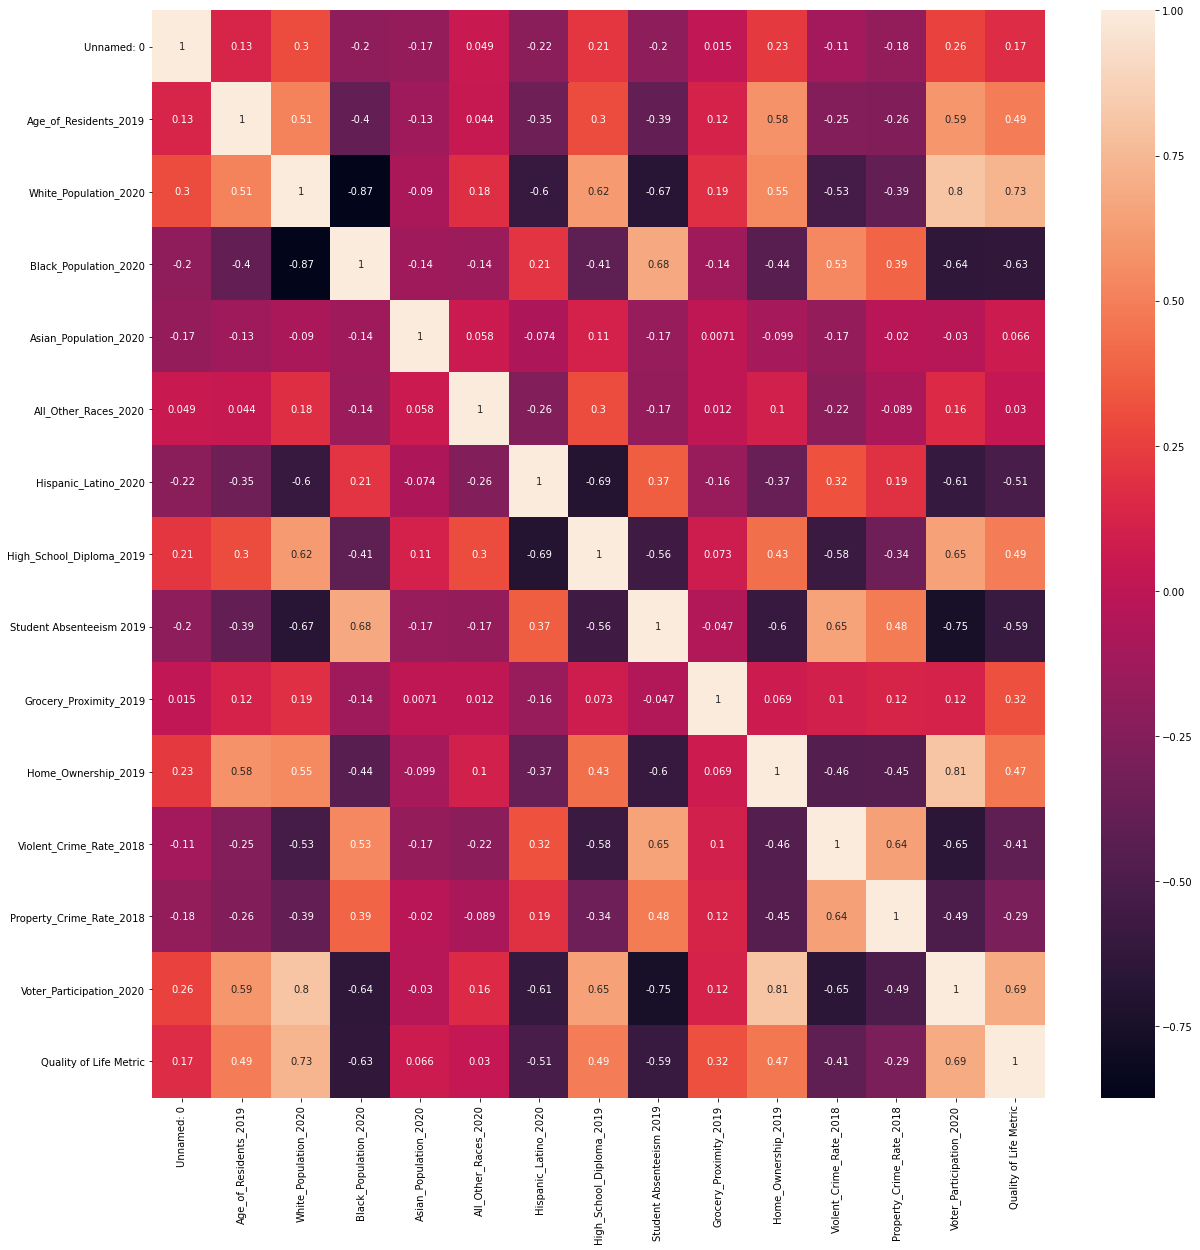

In [1143]:
corrMat = Grid_QOL.corr()
sns.heatmap(corrMat, annot=True)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

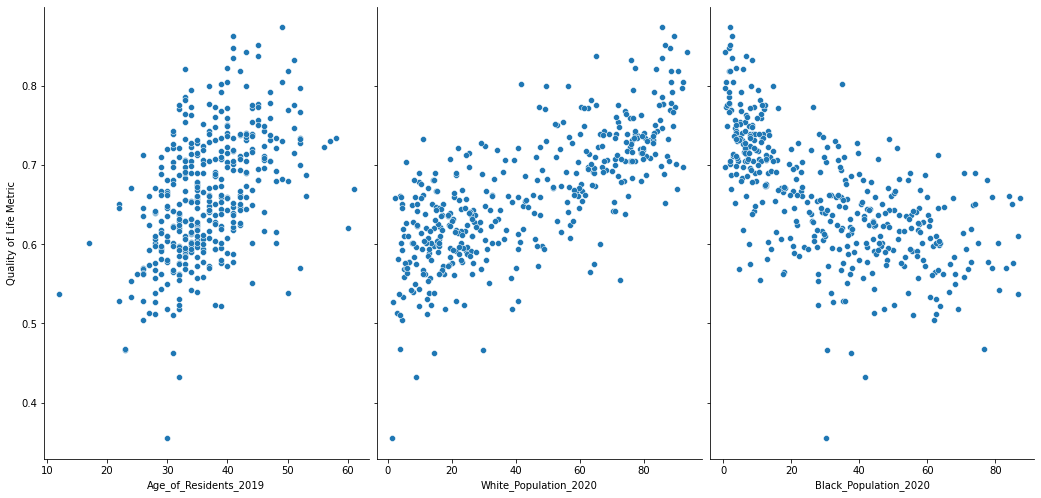

In [1144]:
Grid_QOL.shape
sns.pairplot(Grid_QOL, x_vars=['Age_of_Residents_2019','White_Population_2020','Black_Population_2020'], y_vars='Quality of Life Metric', size=7, aspect=0.7)

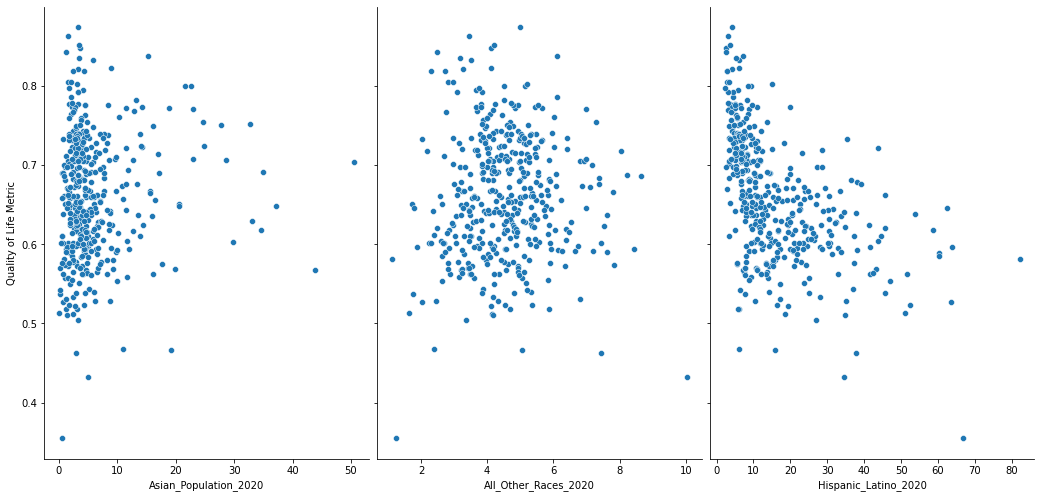

In [1145]:
Grid_QOL.shape
sns.pairplot(Grid_QOL, x_vars=['Asian_Population_2020','All_Other_Races_2020','Hispanic_Latino_2020'], y_vars='Quality of Life Metric', size=7, aspect=0.7)

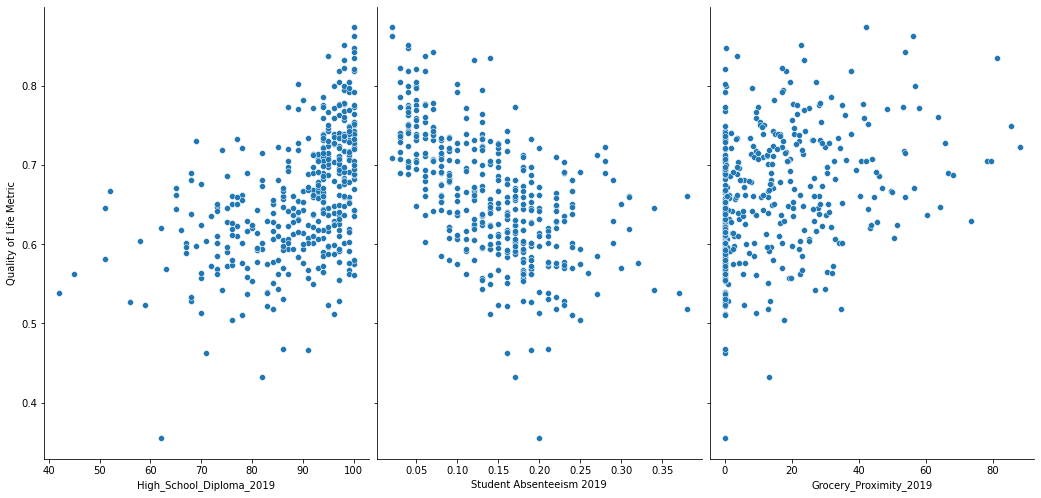

In [1146]:
Grid_QOL.shape
sns.pairplot(Grid_QOL, x_vars=['High_School_Diploma_2019','Student Absenteeism 2019', 'Grocery_Proximity_2019'], y_vars='Quality of Life Metric', size=7, aspect=0.7)

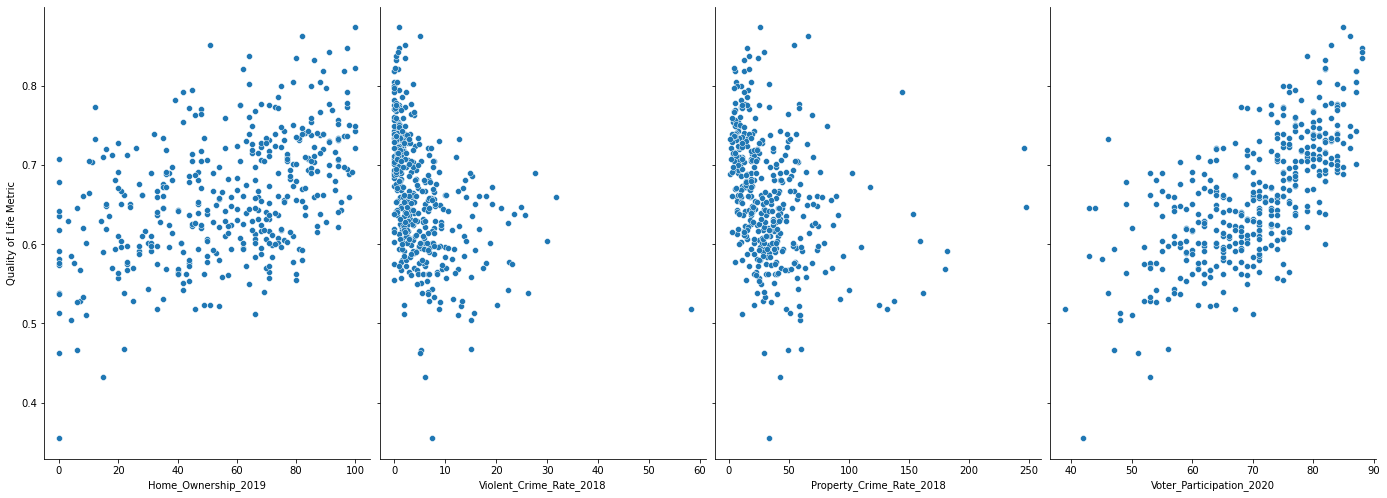

In [1147]:
Grid_QOL.shape
sns.pairplot(Grid_QOL, x_vars=['Home_Ownership_2019','Violent_Crime_Rate_2018','Property_Crime_Rate_2018','Voter_Participation_2020'], y_vars='Quality of Life Metric', size=7, aspect=0.7)

In [1148]:

#Separate data into input and output
X = Grid_QOL.iloc[:,[1,2,3,4,6,7,8,9,10,11,12,13]].values
Y = Grid_QOL.iloc[:, 14].values

In [1149]:
#Split into training and test data
rand = np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, train_size = 0.8, random_state = rand)

In [1150]:
#Standardize training/test data
#sc_X = StandardScaler()
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.fit_transform(X_test)

In [1151]:
LG = linear_model.LinearRegression()

In [1152]:
LG.fit(X_train, Y_train)

LinearRegression()

In [1153]:
LGpred = LG.predict(X_test)

In [1154]:
# The coefficients
print("Coefficients: \n", LG.coef_)
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, LGpred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, LGpred))

Coefficients: 
 [ 0.00097314  0.0082043   0.00701297  0.00844627  0.00657957 -0.00017118
 -0.06940879  0.00079257 -0.00035924  0.00095547 -0.00011292  0.00260888]
Mean squared error:  0.0022469345173139824
Coefficient of determination:  0.6076689113457068


In [1155]:
PCA = PCA()
PCAtrain = PCA.fit_transform(X_train)
PCAtest = PCA.fit_transform(X_test)

In [1156]:
LG.fit(PCAtrain, Y_train)

LinearRegression()

In [1157]:
PCApred = LG.predict(PCAtest)

In [1158]:
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, PCApred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, PCApred))

Mean squared error:  0.0027052957506071636
Coefficient of determination:  0.5276357104361364


In [1159]:
LDA = LinearDiscriminantAnalysis()

In [1160]:
Y = Y.astype('int')
X = X.astype('int')
LDA.fit(X, Y)

LinearDiscriminantAnalysis()

In [1161]:
LDApred = LDA.predict(X_test)

In [1162]:
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, LDApred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, LDApred))

Mean squared error:  0.432519066618379
Coefficient of determination:  -74.52097088836308


In [1163]:
Ridge = linear_model.Ridge(alpha=1500)

In [1164]:
Ridge.fit(X_train, Y_train)

Ridge(alpha=1500)

In [1165]:
Ridgepred = Ridge.predict(X_test)

In [1166]:
# The coefficients
print("Coefficients: \n", Ridge.coef_)
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, Ridgepred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, Ridgepred))

Coefficients: 
 [ 9.24750633e-04  1.31925526e-03  1.78030031e-05  1.40187019e-03
 -2.92271079e-04 -2.31406365e-04 -2.76200118e-05  8.19214670e-04
 -2.25219975e-04  7.45861936e-04 -1.26331456e-04  2.25757023e-03]
Mean squared error:  0.0023428338921466724
Coefficient of determination:  0.5909241838783696


In [1167]:
RidgeCV = linear_model.RidgeCV(alphas = np.logspace(-5, 5, 12))

In [1168]:
RidgeCV.fit(X_train, Y_train)

RidgeCV(alphas=array([1.00000000e-05, 8.11130831e-05, 6.57933225e-04, 5.33669923e-03,
       4.32876128e-02, 3.51119173e-01, 2.84803587e+00, 2.31012970e+01,
       1.87381742e+02, 1.51991108e+03, 1.23284674e+04, 1.00000000e+05]))

In [1169]:
RidgeCVpred = RidgeCV.predict(X_test)

In [1170]:
# The coefficients
print("Coefficients: \n", RidgeCV.coef_)
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, RidgeCVpred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, RidgeCVpred))

Coefficients: 
 [ 0.00094876  0.00695681  0.00571436  0.00727998  0.0054096  -0.00012432
 -0.00144667  0.00078842 -0.00035114  0.00096597 -0.00012669  0.00286892]
Mean squared error:  0.0023384467613106314
Coefficient of determination:  0.5916902087908492


In [1171]:
Lasso = linear_model.Lasso(alpha=0.001)

In [1172]:
Lasso.fit(X_train, Y_train)

Lasso(alpha=0.001)

In [1173]:
Lassopred = Lasso.predict(X_test)

In [1174]:
# The coefficients
print("Coefficients: \n", Lasso.coef_)
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, Lassopred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, Lassopred))

Coefficients: 
 [ 0.00092938  0.00505853  0.00381468  0.00536281  0.00353017 -0.00015597
 -0.          0.00079228 -0.00033983  0.00099438 -0.00012743  0.0028583 ]
Mean squared error:  0.0023411452839220016
Coefficient of determination:  0.5912190271405968


In [1175]:
LassoCV = linear_model.LassoCV(alphas = np.logspace(-5, 5, 12))

In [1176]:
LassoCV.fit(X_train, Y_train)

LassoCV(alphas=array([1.00000000e-05, 8.11130831e-05, 6.57933225e-04, 5.33669923e-03,
       4.32876128e-02, 3.51119173e-01, 2.84803587e+00, 2.31012970e+01,
       1.87381742e+02, 1.51991108e+03, 1.23284674e+04, 1.00000000e+05]))

In [1177]:
LassoCVpred = LassoCV.predict(X_test)

In [1178]:
# The coefficients
print("Coefficients: \n", LassoCV.coef_)
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, LassoCVpred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, LassoCVpred))

Coefficients: 
 [ 0.00097151  0.00726799  0.00607671  0.00752753  0.00567387 -0.00017741
 -0.061585    0.00079361 -0.00036375  0.00101722 -0.00011837  0.00268378]
Mean squared error:  0.0022579446657793544
Coefficient of determination:  0.6057464594449595


In [1179]:
Elastic = linear_model.ElasticNet(alpha = 0.1, l1_ratio = 0.7)

In [1180]:
Elastic.fit(X_train, Y_train)

ElasticNet(alpha=0.1, l1_ratio=0.7)

In [1181]:
Elasticpred = Elastic.predict(X_test)

In [1182]:
# The coefficients
print("Coefficients: \n", Elastic.coef_)
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, Elasticpred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, Elasticpred))

Coefficients: 
 [ 0.00000000e+00  1.60794787e-03 -0.00000000e+00  0.00000000e+00
 -1.62524358e-04  0.00000000e+00 -0.00000000e+00  6.69838089e-04
  1.40310120e-04 -0.00000000e+00 -3.59052253e-05  5.11407330e-04]
Mean squared error:  0.0024697093913503385
Coefficient of determination:  0.56877080008255


In [1183]:
Lars = linear_model.Lars()

In [1184]:
Lars.fit(X_train, Y_train)

Lars()

In [1185]:
Larspred = Lars.predict(X_test)

In [1186]:
# The coefficients
print("Coefficients: \n", Lars.coef_)
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, Larspred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, Larspred))

Coefficients: 
 [ 0.00097314  0.0082043   0.00701297  0.00844627  0.00657957 -0.00017118
 -0.06940879  0.00079257 -0.00035924  0.00095547 -0.00011292  0.00260888]
Mean squared error:  0.0022469345173139733
Coefficient of determination:  0.6076689113457083


In [1187]:
LarsLasso = linear_model.LassoLars(alpha = 0.1, normalize = False)

In [1188]:
LarsLasso.fit(X_train, Y_train)

LassoLars(alpha=0.1, normalize=False)

In [1189]:
LarsLassopred = LarsLasso.predict(X_test)

In [1190]:
# The coefficients
print("Coefficients: \n", LarsLasso.coef_)
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, LarsLassopred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, LarsLassopred))

Coefficients: 
 [ 0.00000000e+00  1.73068281e-03  0.00000000e+00  0.00000000e+00
 -4.70726035e-05  0.00000000e+00  0.00000000e+00  5.67499923e-04
  2.29558575e-04  0.00000000e+00 -9.84127874e-06  0.00000000e+00]
Mean squared error:  0.002502089652200938
Coefficient of determination:  0.5631169713249536


In [1191]:
BayesRidge = linear_model.BayesianRidge()

In [1192]:
BayesRidge.fit(X_train, Y_train)

BayesianRidge()

In [1193]:
BayesRidgepred = BayesRidge.predict(X_test)

In [1194]:
# The coefficients
print("Coefficients: \n", BayesRidge.coef_)
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, BayesRidgepred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, BayesRidgepred))

Coefficients: 
 [ 9.21231843e-04  1.28310941e-03 -2.26877743e-05  1.35157108e-03
 -3.35652494e-04 -2.29376228e-04 -2.58715538e-05  8.20143842e-04
 -2.16320525e-04  7.18057372e-04 -1.25184920e-04  2.21127976e-03]
Mean squared error:  0.0023411538569766536
Coefficient of determination:  0.5912175302229792


In [1195]:
ARD = linear_model.ARDRegression(threshold_lambda=3e4)

In [1196]:
ARD.fit(X_train, Y_train)

ARDRegression(threshold_lambda=30000.0)

In [1197]:
ARDpred = ARD.predict(X_test)

In [1198]:
# The coefficients
print("Coefficients: \n", ARD.coef_)
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, ARDpred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, ARDpred))

Coefficients: 
 [ 0.          0.0082716   0.00655869  0.00780255  0.00574279  0.
 -0.11052055  0.          0.          0.          0.          0.        ]
Mean squared error:  0.0025038320769357955
Coefficient of determination:  0.56281273130912


In [1199]:
PAR = linear_model.PassiveAggressiveRegressor()

In [1200]:
PAR.fit(X_train, Y_train)

PassiveAggressiveRegressor()

In [1201]:
PARpred = PAR.predict(X_test)

In [1202]:
# The coefficients
print("Coefficients: \n", PAR.coef_)
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, PARpred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, PARpred))

Coefficients: 
 [ 1.55672466e-03  2.02867931e-03  1.20895149e-03  7.22016134e-04
  1.76844102e-03  2.78346890e-03  1.16469691e-05  8.74223611e-04
 -1.19340011e-04  8.10472799e-04 -2.22845530e-05  3.11688256e-03]
Mean squared error:  0.003936050361931438
Coefficient of determination:  0.3127370149884535


In [1203]:
Tweedie = linear_model.TweedieRegressor(power = 2, alpha = 0.001, link = 'log')

In [1204]:
Tweedie.fit(X_train, Y_train)

TweedieRegressor(alpha=0.001, link='log', power=2)

In [1205]:
Tweediepred = Tweedie.predict(X_test)

In [1206]:
# The coefficients
print("Coefficients: \n", Tweedie.coef_)
# The mean squared error
print("Mean squared error: ",mean_squared_error(Y_test, Tweediepred))
# The coefficient of determination
print("Coefficient of determination: ",r2_score(Y_test, Tweediepred))

Coefficients: 
 [ 0.00123863 -0.00169437 -0.00362094 -0.00123178 -0.00421888 -0.00071817
 -0.00361999  0.00122778 -0.00039014  0.00203818 -0.00026884  0.00399476]
Mean squared error:  0.00244162754924396
Coefficient of determination:  0.5736740937033111
